<a href="https://colab.research.google.com/github/busung/machine-learning-practice/blob/main/%ED%9A%8C%EA%B7%80%EC%99%80_%EA%B7%9C%EC%A0%9C(%EC%86%8C%EC%9B%A8%EC%9C%B5_4%EC%A3%BC%EC%B0%A8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 회귀

## KNN

### 데이터 살펴보기

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

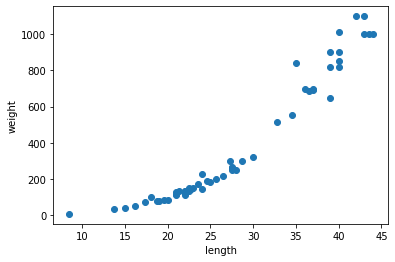

In [6]:
plt.scatter(perch_length,perch_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

### 데이터 분리
* 이 때 reshape을 통하여 2차원 배열로 만들어 주는 것에 주목

In [19]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_label,test_label = train_test_split(perch_length,perch_weight)

In [20]:
print(train_input)

print(train_input.shape)

[24.   8.4 27.3 26.5 22.  28.7 25.  40.  43.  16.2 22.5 35.  22.  18.
 21.  37.  22.7 24.6 25.6 37.  21.  19.  18.7 30.  21.  42.  36.  22.
 21.3 27.5 15.  17.4 40.  22.  22.5 19.6 40.  43.  24.  22.  27.5 32.8]
(42,)


In [21]:
train_input = train_input.reshape(-1,1)
train_input.shape

test_input = test_input.reshape(-1,1)
test_input.shape

(14, 1)

In [22]:
print(train_input)

print(train_input.shape)

[[24. ]
 [ 8.4]
 [27.3]
 [26.5]
 [22. ]
 [28.7]
 [25. ]
 [40. ]
 [43. ]
 [16.2]
 [22.5]
 [35. ]
 [22. ]
 [18. ]
 [21. ]
 [37. ]
 [22.7]
 [24.6]
 [25.6]
 [37. ]
 [21. ]
 [19. ]
 [18.7]
 [30. ]
 [21. ]
 [42. ]
 [36. ]
 [22. ]
 [21.3]
 [27.5]
 [15. ]
 [17.4]
 [40. ]
 [22. ]
 [22.5]
 [19.6]
 [40. ]
 [43. ]
 [24. ]
 [22. ]
 [27.5]
 [32.8]]
(42, 1)


### 학습

In [23]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input,train_label)

KNeighborsRegressor()

### 평가
* R^2(결정계수)가 결과값으로 주어짐
* SST = SSE+SSR => 총 변동 = Error + 설명 가능
* SSR/SST = 1-(SSE/SST)로써 총 변동에 대하여 설명 불가능한 변동이 크다면 R^2는 작아진다
* 즉 R^2가 작을 수록 잘 적합되었다고 할 수 있음

In [25]:
knr.score(test_input,test_label)

0.9556022351815593

### 평가(MAE)
* 오차를 다 더하여 절대값을 취한 것

In [27]:
from sklearn.metrics import mean_absolute_error
test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_label,test_prediction)
mae

49.42142857142857

### over vs under fitting
*test score를 기준으로 평가함
* under fitting
=> train score < test score 일 경우 or 둘 다 점수가 낮을 경우
  * 데이터의 부족으로 발생하는 현상
* over fitting
=> train > test 일 경우

In [28]:
knr.score(train_input,train_label)

0.9787788331609503

In [30]:
knr.score(test_input,test_label)

0.9556022351815593

#### under or over fiitng 해결책

In [50]:
# k-means의 경우 K의 수를 조절함으로써 조절 가능
knr.n_neighbors = 7
knr.fit(train_input,train_label)

KNeighborsRegressor(n_neighbors=7)

In [51]:
knr.score(train_input,train_label)

0.9668115720046666

In [52]:
knr.score(test_input,test_label)

0.9546705149575729

### 선형회귀
* 밑의 첫 번째 그래프를 보면 KNN은 현재 가진 data의 범위 그 이상을 예측하기가 어렵다
* 이를 극복 할 수 있는 방법이 바로 선형 회귀

In [53]:
knr.n_neighbors = 3
knr.fit(train_input,train_label)

KNeighborsRegressor(n_neighbors=3)

In [54]:
knr.predict([[50]])

array([1066.66666667])

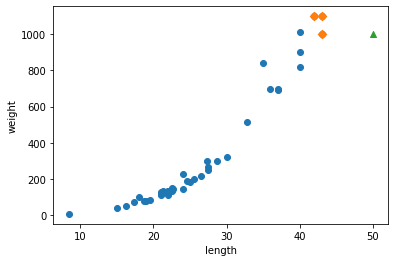

In [58]:
#KNN의 평균법의 문제점
distances,indexs = knr.kneighbors([[50]])
plt.scatter(train_input,train_label)
plt.scatter(train_input[indexs],train_label[indexs],marker='D')
plt.scatter(50,1000,marker='^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [57]:
indexs

array([[ 8, 37, 25]])

In [60]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input,train_label)

LinearRegression()

### 평가 및 예측

In [61]:
# KNN보다 훨씬 더 높은 수치를 예상하는 것을 확인 할 수 있다.
lr.predict([[50]])

array([1216.16235572])

In [62]:
print(lr.coef_,lr.intercept_)

[37.48627066] -658.1511774541602


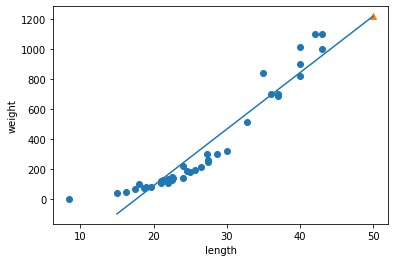

In [64]:
plt.scatter(train_input, train_label)
plt.plot([15,50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_+lr.intercept_])
plt.scatter(50, 1216.1, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [65]:
print(lr.score(train_input, train_label))
print(lr.score(test_input, test_label))

0.905764171577058
0.9339815753271444


## 다항회귀
* 단순 선형이 아닌 2차 이상의 다항식을 활용하여 회귀하는 것

In [66]:
train_poly = np.column_stack((train_input**2,train_input))
test_poly = np.column_stack((test_input**2,test_input))

In [76]:
lr = LinearRegression()
lr.fit(train_poly,train_label)
print(lr.predict([[50**2,50]]))

[69.76745357]


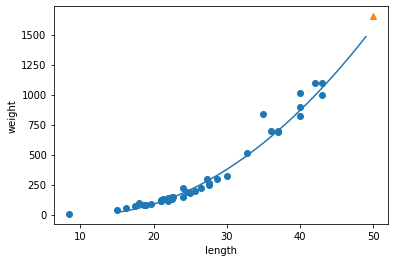

In [72]:
point = np.arange(15, 50)
plt.scatter(train_input, train_label)
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)
plt.scatter([50], [1653], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [73]:
print(lr.score(train_poly,train_label))
print(lr.score(test_poly,test_label))

0.9767474663957202
0.9390360002526246


## 다중회귀
* Feature를 하나가 아닌 여러 개를 이용하여 회귀하는 것

In [78]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()#label이 numpy이라  Data역시 numpy로 변환
# print(perch_full)

In [80]:
df

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94
5,18.0,5.22,3.32
6,18.7,5.20,3.12
7,19.0,5.64,3.05
8,19.6,5.14,3.04
9,20.0,5.08,2.77


In [81]:
perch_full

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

### 데이터 분리

In [107]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_label,test_label = train_test_split(perch_full,perch_weight)

### 데이터 전처리

In [108]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))#절편,2,3,2^2,3^2,2*3을 만들어줌

[[1. 2. 3. 4. 6. 9.]]


In [109]:
poly = PolynomialFeatures(include_bias=False)#절편을 포함하지 않음
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
train_poly[0]#3개의 피처 원래 값,제곱항 3개,교호 작용항 3개

array([ 15.    ,   3.82  ,   2.43  , 225.    ,  57.3   ,  36.45  ,
        14.5924,   9.2826,   5.9049])

### 학습

In [110]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly,train_label)
print(lr.score(train_poly,train_label))

0.9933542965696154


In [111]:
print(lr.score(test_poly,test_label))

0.7309999108099932


In [112]:
#상당한 과적합이 일어난 것을 확인 할 수 있음
poly = PolynomialFeatures(degree=5,include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [113]:
lr.fit(train_poly,train_label)
print(lr.score(train_poly,train_label))

0.9999999997100149


In [114]:
print(lr.score(test_poly,test_label))

-740323.5422364115


## 규제
* 모든 규제전에는 표준화를 진행해야함
* Overfitting을 예방하는 방법(under에는 사용하지 않음)
* RIdge
  * 계수의 제곱으로 규제하는 것
* Lasso
  * 계수의 절대값으로 규제하는 것

In [115]:
#표준화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

### Ridge

In [116]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled,train_label)
print(ridge.score(train_scaled,train_label))

0.9919200396716266


In [117]:
print(ridge.score(test_scaled,test_label))

0.9555104033352595


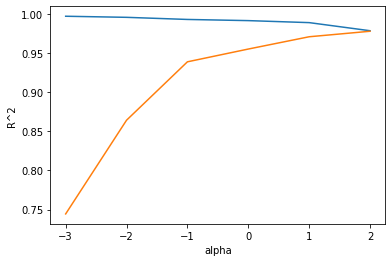

In [118]:
#그래프를 봣을 때 파란색 = test, 노란색 = train
#이 때 test와 train의 gap이 가장 작으면서 R^2이 높은 alpha값을 찾아야 함
import matplotlib.pyplot as plt
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_scaled, train_label)
  train_score.append(ridge.score(train_scaled, train_label))
  test_score.append(ridge.score(test_scaled, test_label))
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()    

In [122]:
ridge = Ridge(alpha=100)
ridge.fit(train_scaled, train_label)

print(ridge.score(train_scaled, train_label))
print(ridge.score(test_scaled, test_label))

0.9789675604991858
0.9782907360971752


### Lasso

In [125]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled,train_label)
print(lasso.score(train_scaled,train_label))

0.9906630150550153


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.439e+02, tolerance: 4.606e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [126]:
print(lasso.score(test_scaled, test_label))

0.9645593789792895


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.093e+03, tolerance: 4.606e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.228e+03, tolerance: 4.606e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


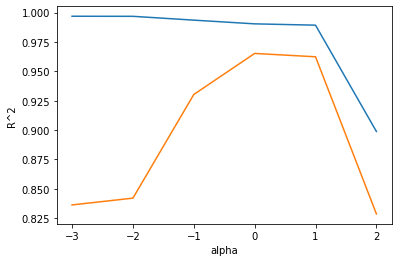

In [127]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(train_scaled, train_label)
    train_score.append(lasso.score(train_scaled, train_label))
    test_score.append(lasso.score(test_scaled, test_label))
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()    

In [130]:
lasso = Lasso(alpha=1)
lasso.fit(train_scaled, train_label)

print(lasso.score(train_scaled, train_label))
print(lasso.score(test_scaled, test_label))

0.9906630150550153
0.9645593789792895


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.439e+02, tolerance: 4.606e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
